<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


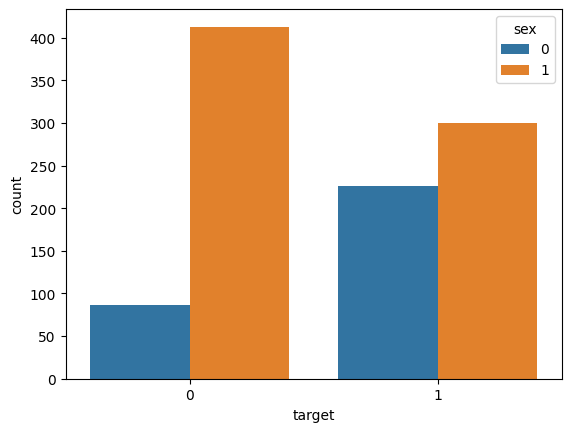

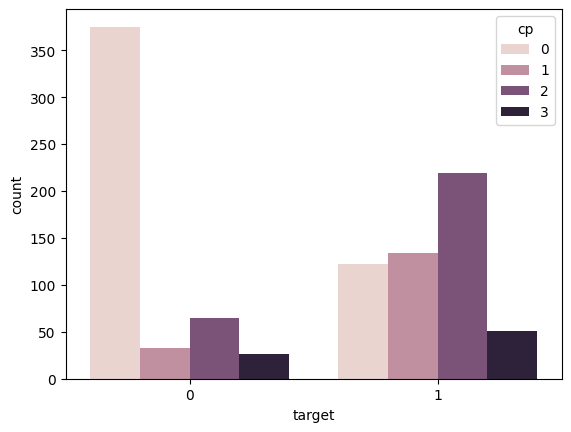

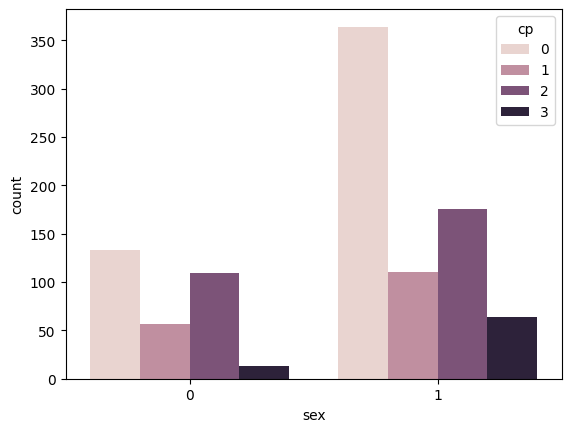

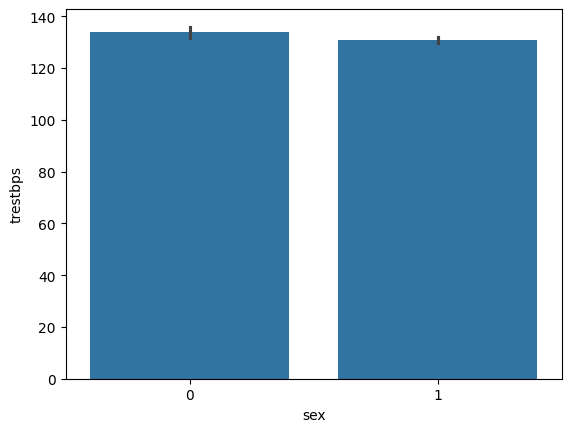

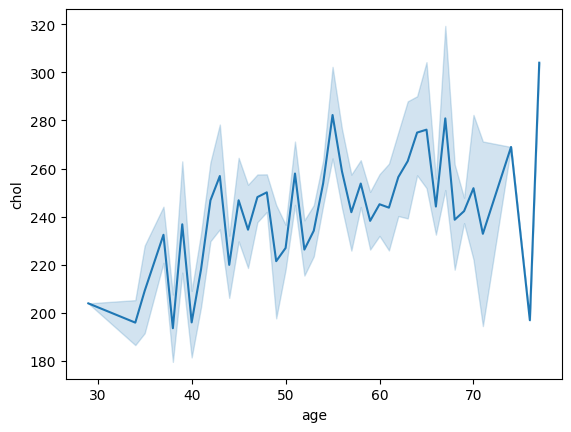

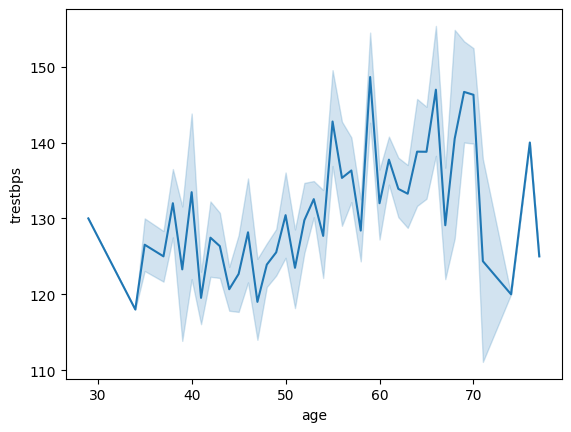

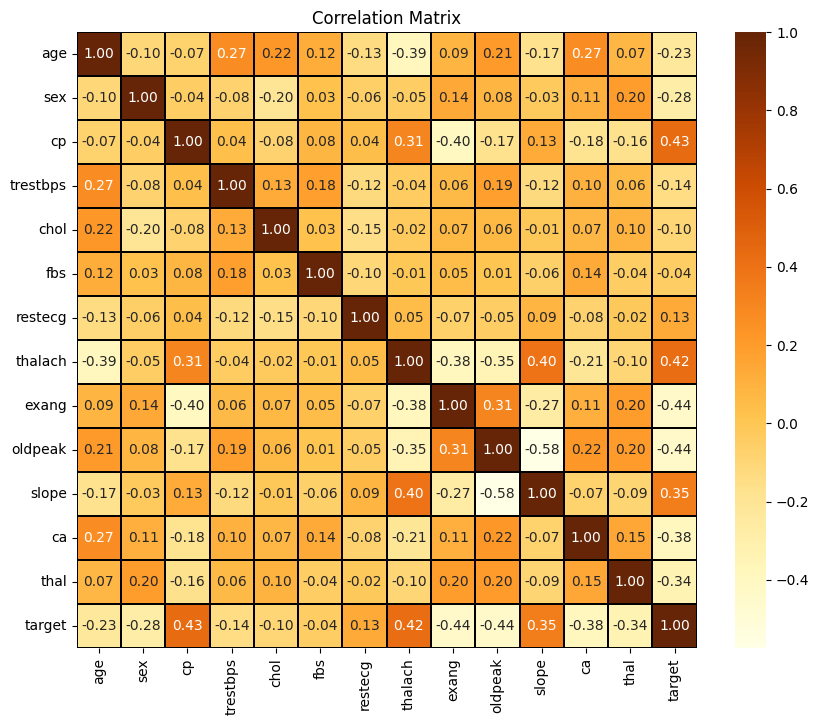

SVC
Accuracy: 0.8146
Precision: 0.7600
Recall: 0.9223
F1-Score: 0.8333

K-Neighbors
Accuracy: 0.8341
Precision: 0.8000
Recall: 0.8932
F1-Score: 0.8440

Gaussian-NaiveBay
Accuracy: 0.8000
Precision: 0.7541
Recall: 0.8932
F1-Score: 0.8178

Bernoulli-NaiveBay
Accuracy: 0.7951
Precision: 0.7652
Recall: 0.8544
F1-Score: 0.8073

Decision Tree
Accuracy: 0.8439
Precision: 0.7840
Recall: 0.9515
F1-Score: 0.8596

Logistic Regression
Accuracy: 0.7951
Precision: 0.7563
Recall: 0.8738
F1-Score: 0.8108

Random Forest
Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852

AdaBoost
Accuracy: 0.8146
Precision: 0.7928
Recall: 0.8544
F1-Score: 0.8224

ExtraTree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Gradient Boosting
Accuracy: 0.8976
Precision: 0.8727
Recall: 0.9320
F1-Score: 0.9014

                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVC  0.814634   0.760000  0.922330  0.833333
1          K-Neighbors  0.834146   0.800000  0.893204 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:/Users/KIIT/Project/Minor Project')

df = pd.read_csv('heart.csv')

df.info()
df.isnull().sum()

X = df.drop("target", axis=1)
y = df["target"]

sns.countplot(x=df['target'], hue='sex', data=df)
plt.show()

sns.countplot(x=df['target'], hue='cp', data=df)
plt.show()

sns.countplot(x=df['sex'], hue='cp', data=df)
plt.show()

sns.barplot(x=df['sex'], y=df['trestbps'], data=df)
plt.show()

sns.lineplot(x=df['age'], y=df['chol'], data=df)
plt.show()

sns.lineplot(x=df['age'], y=df['trestbps'], data=df)
plt.show()

correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.2, linecolor='black', fmt=".2f", cmap="YlOrBr")
plt.title('Correlation Matrix')
plt.show()

from sklearn.preprocessing import LabelEncoder, StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
y = LabelEncoder().fit_transform(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier

svc = SVC(kernel='linear', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=2)

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

classy = {
    'SVC': svc,
    'K-Neighbors': knc,
    'Gaussian-NaiveBay': gnb,
    'Bernoulli-NaiveBay': bnb,
    'Decision Tree': dtc,
    'Logistic Regression': lrc,
    'Random Forest': rfc,
    'AdaBoost': abc,
    'ExtraTree': etc,
    'Gradient Boosting': gbdt,
}

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, clf in classy.items():
    current_accuracy, current_precision, current_recall, current_f1 = train_classifier(clf, x_train, y_train, x_test, y_test)

    print(f"{name}")
    print(f"Accuracy: {current_accuracy:.4f}")
    print(f"Precision: {current_precision:.4f}")
    print(f"Recall: {current_recall:.4f}")
    print(f"F1-Score: {current_f1:.4f}")
    print("")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

results_df = pd.DataFrame({
    'Model': classy.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

print(results_df)